In [1]:
#Importing Required Libraries
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
with open('dataset_dict.pickle', 'rb') as file:
    dataset_dict = pickle.load(file)

In [6]:
X_train = dataset_dict['X_train']
y_train = dataset_dict['y_train']
X_test = dataset_dict['X_test']
y_test = dataset_dict['y_test']

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
1671,1,0.431396,0.883881,0,0,0.161844,0.268123,0.254757,1.323337,-0.595410,-0.315866,-0.414562
1284,0,3.347173,-2.410652,0,0,-0.010559,-0.017576,0.046536,-1.070954,-0.991730,-0.315866,-0.414562
8,1,2.180862,2.671612,0,1,-0.130626,-0.874670,-0.097365,-1.835089,0.197231,-0.315866,0.347100
543,0,-0.443337,-1.389091,0,0,0.398898,1.018080,0.539289,0.813913,0.989871,0.912606,-0.414562
303,1,0.722974,-0.265375,1,0,-0.555476,-0.374698,-0.609741,-0.153991,-1.388050,-0.315866,1.870425
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0,0.042626,-0.239836,1,1,-1.397479,-0.124712,-1.622501,1.679933,-0.595410,-0.315866,-1.176224
1593,1,-0.151759,-0.012835,0,1,-0.403084,-0.481835,-0.425504,-0.204934,0.593551,-0.315866,-0.414562
1878,1,1.889284,-1.031545,1,0,-0.019795,0.303835,0.035634,0.966740,0.593551,-0.315866,-0.414562
605,1,-0.443337,-0.214297,0,0,-0.122929,-0.231849,-0.088644,0.355432,-1.388050,-0.315866,0.347100


## KNN classifier

In [8]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.885


In [9]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       521
         1.0       0.86      0.15      0.26        79

    accuracy                           0.89       600
   macro avg       0.87      0.57      0.60       600
weighted avg       0.88      0.89      0.85       600



## SVM classifier

In [10]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.885


In [11]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       521
         1.0       0.86      0.15      0.26        79

    accuracy                           0.89       600
   macro avg       0.87      0.57      0.60       600
weighted avg       0.88      0.89      0.85       600



## RandomForest Classifier

In [4]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9116666666666666


In [7]:
model_rf.predict([[0, 36, 62, 0, 0, 148.35, 12.2, 16.81, 82, 1, 4, 1]])

array([1.])

In [15]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       521
         1.0       0.80      0.44      0.57        79

    accuracy                           0.91       600
   macro avg       0.86      0.71      0.76       600
weighted avg       0.90      0.91      0.90       600



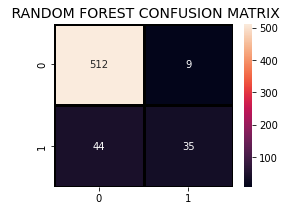

In [21]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

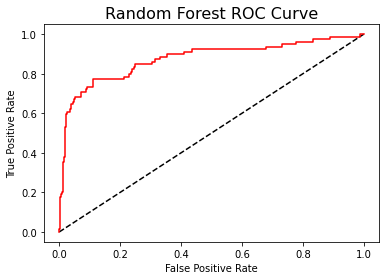

In [22]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

### Logistic Regression

In [23]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8816666666666667


In [24]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       521
         1.0       0.75      0.15      0.25        79

    accuracy                           0.88       600
   macro avg       0.82      0.57      0.59       600
weighted avg       0.87      0.88      0.85       600



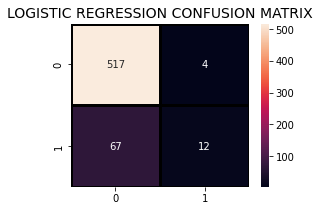

In [25]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

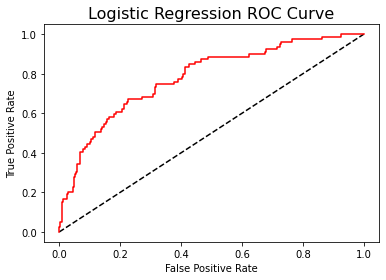

In [26]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

### Decision Tree Classifier

In [27]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.8683333333333333


In [28]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       521
         1.0       0.50      0.57      0.53        79

    accuracy                           0.87       600
   macro avg       0.72      0.74      0.73       600
weighted avg       0.88      0.87      0.87       600



### Adaboost Classifier

In [29]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8716666666666667

In [30]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       521
         1.0       0.52      0.28      0.36        79

    accuracy                           0.87       600
   macro avg       0.71      0.62      0.65       600
weighted avg       0.85      0.87      0.85       600



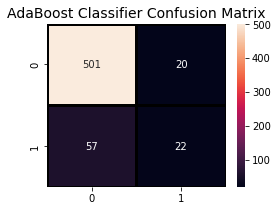

In [31]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

### Gradientboost classifier

In [32]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))


Gradient Boosting Classifier 0.9116666666666666


 - The performance looks similar to that of RandomForest

In [33]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       521
         1.0       0.75      0.49      0.60        79

    accuracy                           0.91       600
   macro avg       0.84      0.73      0.77       600
weighted avg       0.90      0.91      0.90       600



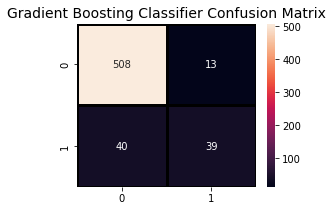

In [34]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

### Since, randomforest and gradient boosting classifier has best and almost equal performances, we'll serialize randomforest model

In [35]:
with open('model_rf.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

In [9]:
with open('model_rf.pkl', 'rb') as file:
    model = pickle.load(file)

In [10]:
model.predict([[0, 36, 62, 0, 0, 148.35, 12.2, 16.81, 82, 1, 4, 1]])

array([1.])

In [11]:
with open('standardization_scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [14]:
scaler.transform([36])

ValueError: Expected 2D array, got 1D array instead:
array=[36.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
[a, b, c] = [1, 2, 3]

In [16]:
a


1

In [17]:
c

3